In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
from IPython.display import Audio

This is the main directory

In [14]:
os.getcwd()

'C:\\Users\\Brandon\\OneDrive\\Audio Data Processing Lessons\\audiofiles'

In [6]:
os.chdir("audiofiles/") #Change to the audiofile directory

Listen in the 4 audio clips for this example

In [16]:
Audio(os.path.join(os.getcwd(),"piano-C4.wav"))

In [17]:
Audio(os.path.join(os.getcwd(),"trumpet-C4.wav"))

In [18]:
Audio(os.path.join(os.getcwd(),"violin-C4.wav"))

In [19]:
Audio(os.path.join(os.getcwd(),"flute-C4.wav"))

Load the files to process via librosa

In [21]:
piano, sr = librosa.load(os.path.join(os.getcwd(),"piano-C4.wav"))
trumpet, _ = librosa.load(os.path.join(os.getcwd(),"trumpet-C4.wav"))
violin, _ = librosa.load(os.path.join(os.getcwd(),"violin-C4.wav"))
flute, _ = librosa.load(os.path.join(os.getcwd(),"flute-C4.wav"))

In [23]:
sr #Used Librosa Default of 22050

22050

Now apply Numpy's Fast Fourier Transform via `np.fft.ftt()`

In [24]:
piano_ft = np.fft.fft(piano)
trumpet_ft = np.fft.fft(trumpet)
violin_ft = np.fft.fft(violin)
flute_ft = np.fft.fft(flute)

Lets prepare to visualize these FTs
> First, see the size of both the original and the FT variables

In [28]:
piano.shape

(59500,)

In [29]:
piano_ft.shape

(59500,)

They are the same!

This was by design ...  Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT) --- a subset of DFT --- both choose M and N to be the same value

N = # of samples taken (defined by your sample rate ... here the piano file has 59500 samples)
M = # of frequencies taken (defined by N)

On the linspace() of a normal waveplot we have time vs Amp where we must linspace() time values for the x-axis to plot.

Similarly in the frequency domain, we need x-values to plot on the frequency axis (x-axis) and we will use linspace() to do the same exact process

> Lets see what the FFT value is

In [33]:
piano_ft[0]

(-87.49086205479284+0j)

This is a complex number!

What we want to plot is simply the magnitude (the real number value)
> This is easily achieved via np.abs()

In [35]:
piano_mag = np.abs(piano_ft)
piano_mag[0]

87.49086205479284

Visualizing the Magnitude Spectrum (Fourier Transform plots)

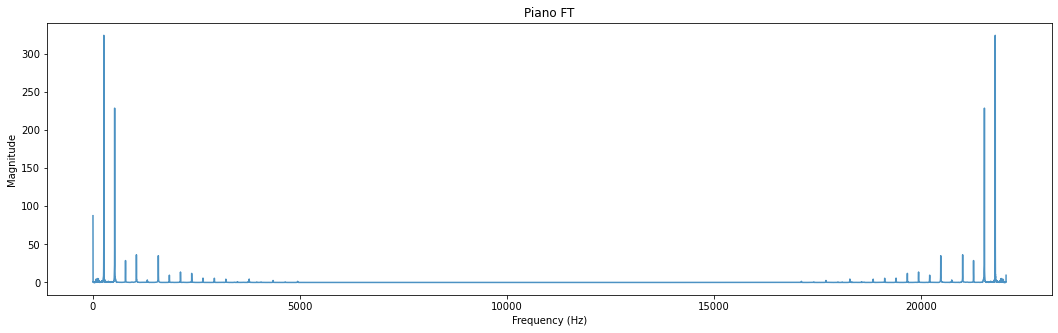

In [36]:
plt.figure(figsize=(18,5))

f = np.linspace(0,sr,len(piano_ft)) #Create the x-axis of frequency values

plt.plot(f,piano_mag,alpha=0.8)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Piano FT")

plt.show()

This is great! ... but as discussed in the lesson, the image is mirrored after $\frac{s_{r}}{2}$ ... so why bother visualizing the rest of the plot --- lets create a wrapper function to process everything

In [41]:
def plot_magnitude_spectrum(sound_ft,sr,title,f_ratio=1):
    mag = np.abs(sound_ft)
    
    plt.figure(figsize=(18,5))

    f = np.linspace(0,sr,len(mag)) #Create the x-axis of frequency values
    stop = int(len(mag)*f_ratio)
    
    plt.plot(f[:stop],mag[:stop],alpha=0.8)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title(title)

    plt.show()

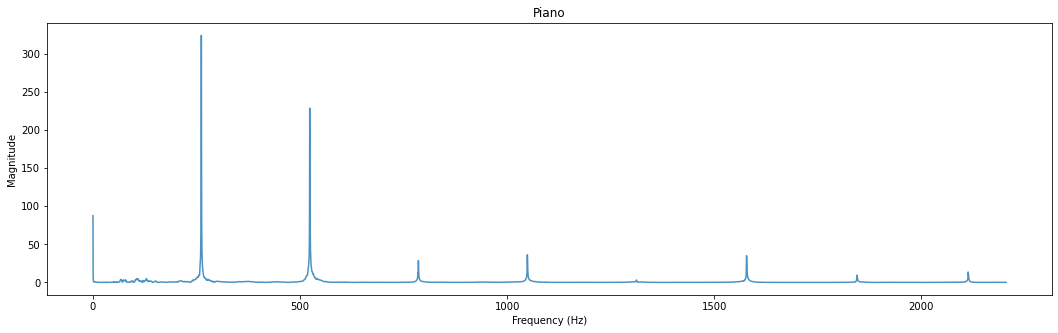

In [48]:
plot_magnitude_spectrum(piano_ft,sr,"Piano",0.1)

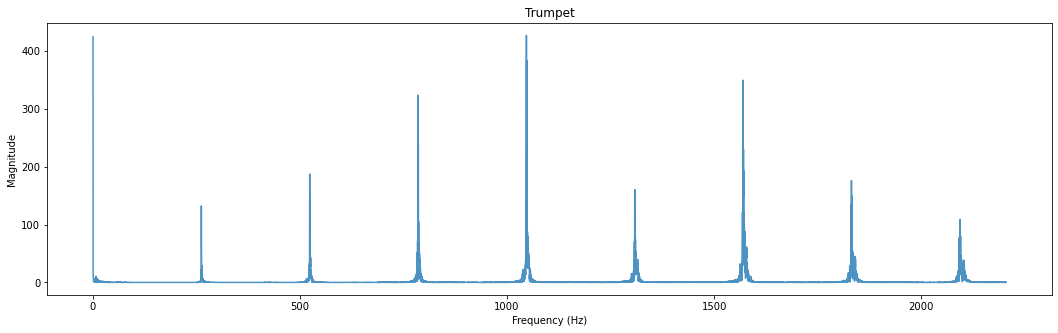

In [49]:
plot_magnitude_spectrum(trumpet_ft,sr,"Trumpet",0.1)

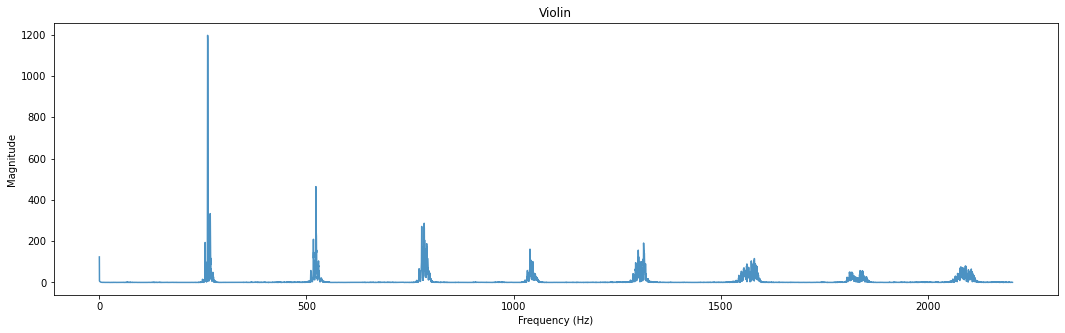

In [50]:
plot_magnitude_spectrum(violin_ft,sr,"Violin",0.1)

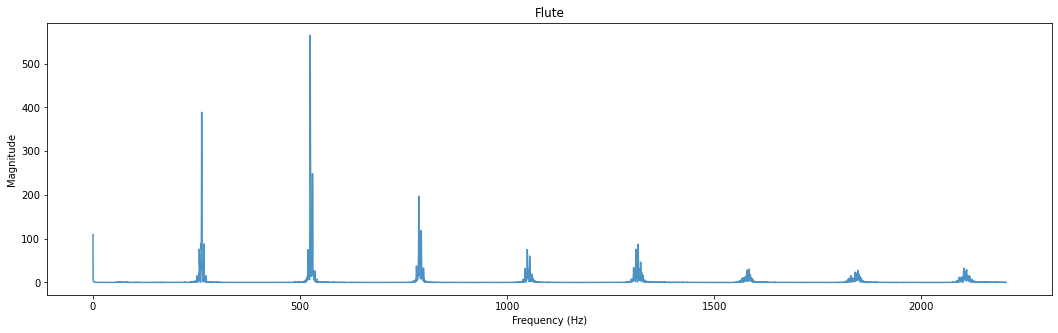

In [51]:
plot_magnitude_spectrum(flute_ft,sr,"Flute",0.1)

Here we can visualize the "timbre" of all these instruments at C4 (261.63 Hz)
> Piano and violin both have a large magnitude spike at the principle C4 frequency and diminishing harmonics <br>
> Trumpet and Flute however show the largest magnitude spike on an overtone (c7 for trumpet, c5 for flute)